<a href="https://colab.research.google.com/github/Devendra1patel/Datascience_colab_code/blob/main/ml_3_1_1_20_april_Handling_missing_value%2C_Outliers_%26_Data_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {
    'A': [1, 2, 100, 4, 5],
    'B': [3, np.nan, 7, 8, 9],
    'C': [np.nan, 12, 13, 14, 15]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,A,B,C
0,1,3.0,NaN
1,2,NaN,12.0
2,100,7.0,13.0
3,4,8.0,14.0
4,5,9.0,15.0


In [ ]:
df.isnull().sum()

,0
A,0
B,1
C,1


In [ ]:
#drop all the rows
df.dropna()

,A,B,C
2,100,7.0,13.0
3,4,8.0,14.0
4,5,9.0,15.0


In [ ]:
#drop a column with missing value
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [ ]:
df['B'].mean()

6.75

In [ ]:
#imputation of missing value with mean

df['B'].fillna(df['B'].mean())

,B
0,3.00
1,6.75
2,7.00
3,8.00
4,9.00


In [ ]:
#imputing with constant
df['B'].fillna(0)

,B
0,3.0
1,0.0
2,7.0
3,8.0
4,9.0


In [ ]:
df['B'].fillna(df['B'].median())

,B
0,3.0
1,7.5
2,7.0
3,8.0
4,9.0


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
(df.isnull().sum() / len(df.index))*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [ ]:
df.shape

(891, 15)

In [ ]:
df['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [ ]:
df['embark_town']

,embark_town
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton
...,...
886,Southampton
887,Southampton
888,Southampton
889,Cherbourg


In [ ]:
df['embark_town'].isna().sum()

2

In [ ]:
## mode value is Southampton that why fill with ...
df['embark_town'] = df['embark_town'].fillna("Southampton")

In [ ]:
df['embark_town'].isna().sum()

0

In [ ]:
df.drop('deck', axis=1, inplace=True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

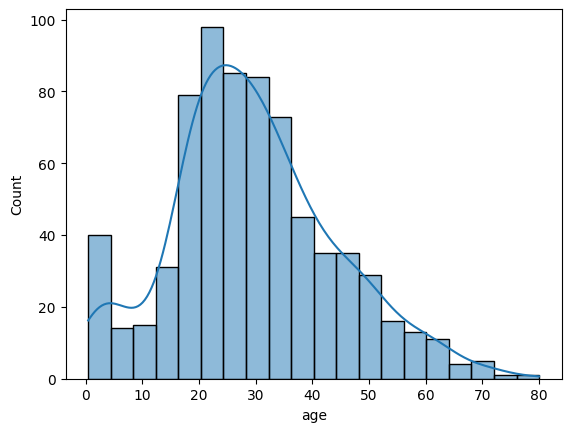

In [ ]:
sns.histplot(df['age'], kde = True)

In [ ]:
df['age'].mean()

29.69911764705882

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Homework >> create a separate column with flag 1 and 0
df['Dev'] = 0

In [ ]:
df.drop('Dev', axis=1, inplace=True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


----------------

```
# This is formatted as code
```

### **data interpolation**------------


In [ ]:
# data interpolation >> is a process of estimating data in a range, getting unknown value from known values
1. Linear Interpolation
2. cubic interpolation
3. Polynomial interpolation

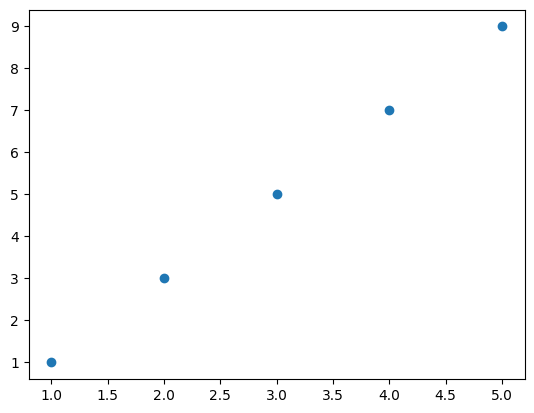

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([1,3,5,7,9])

plt.scatter(x,y)

In [ ]:
# Linear interpolation

x_new = np.linspace(1,5,10)
x_new

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

In [ ]:
y_interp = np.interp(x_new, x, y)
# genrating sinthetic data points which follow same trends

In [ ]:
y_interp

array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
       5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ])

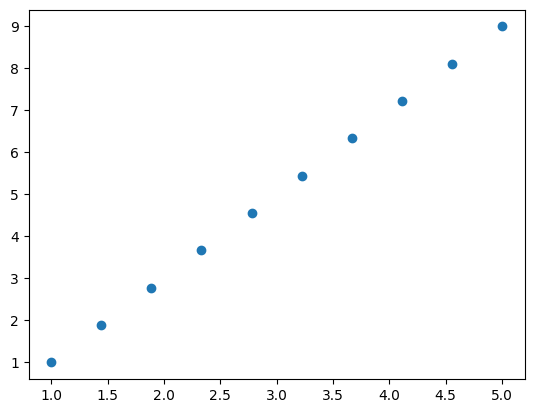

In [ ]:
plt.scatter(x_new, y_interp)

In [ ]:
#cubic interpolation

x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,128])

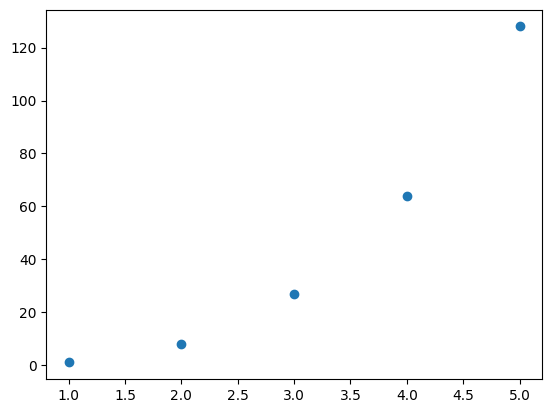

In [ ]:
plt.scatter(x,y)

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
f = interp1d(x,y, kind='cubic')

In [ ]:
f

In [ ]:
x_new = np.linspace(1,5,10)
y_interp = f(x_new)

In [ ]:
y_interp.

array([  1.        ,   2.96570645,   6.72565158,  12.74074074,
        21.47187929,  33.38820302,  49.14814815,  69.5994513 ,
        95.59807956, 128.        ])

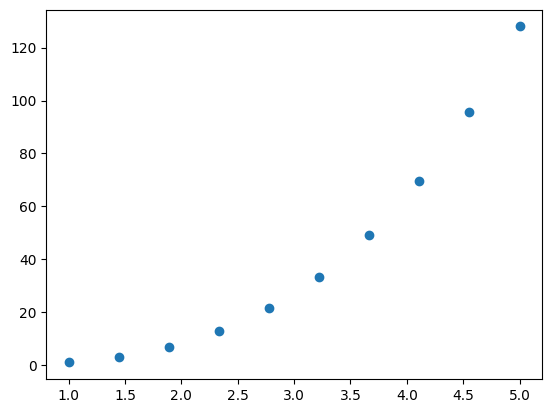

In [ ]:
plt.scatter(x_new, y_interp)

In [ ]:
# polynomial interpolation
#polynomial interpolation

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 1, 25])

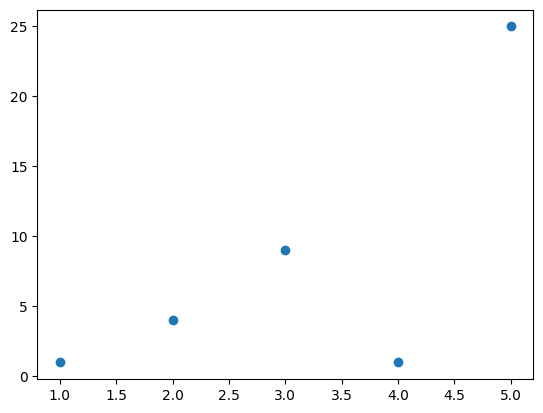

In [ ]:
plt.scatter(x, y)

In [ ]:
 p = np.polyfit(x, y, 2)

In [ ]:
x_new = np.linspace(1, 5, 10)
y_interp = np.polyval(p, x_new)

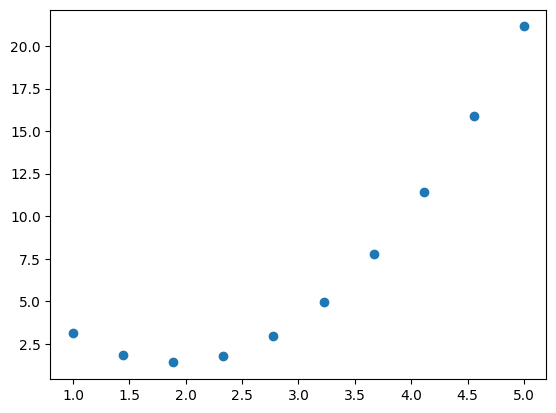

In [ ]:
plt.scatter(x_new, y_interp)

***It use to find misssing value, not for few use for find lot of missing value's, but without knowing nature of data we cann't found it.***

In [ ]:
########  filter outlirer [ deal with outliear's ]

In [ ]:
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#five point summary
np.quantile(salary, [0, 0.25, .50, .75, 1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [ ]:
df = pd.DataFrame(salary, columns = ['Salary'])

In [ ]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


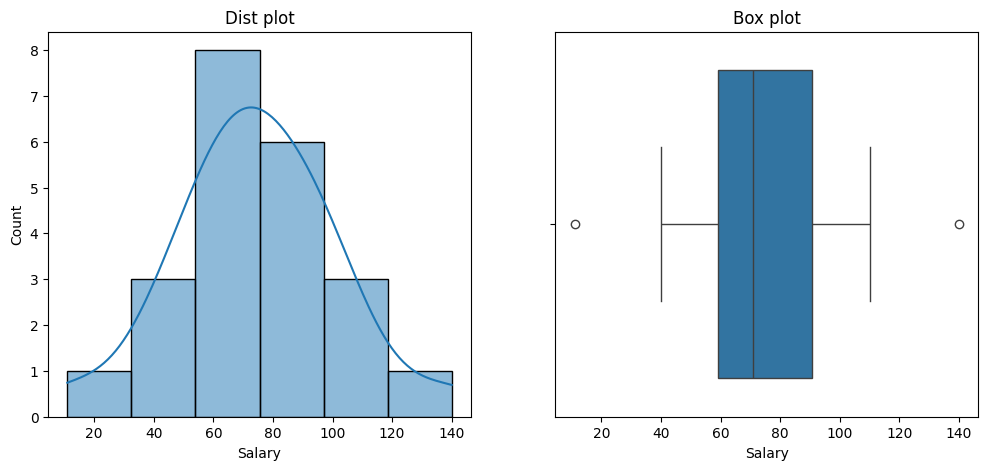

In [ ]:
#To check outliers >> distplot, boxplot


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x  = 'Salary')
plt.title("Box plot")

plt.show()

In [ ]:
#dropping the outlier
#capping the outlier
#replace with mean and median
#Scaling and transformation

In [ ]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

In [ ]:
Q1

59.0

In [ ]:
Q3

90.75

In [ ]:
IQR = Q3-Q1
IQR

31.75

In [ ]:
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [ ]:
lower_fence

11.375

In [ ]:
upper_fence

138.375

In [ ]:
df.shape

(22, 1)

In [ ]:
#dropping the outlier
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [ ]:
df_filtered.shape

(20, 1)

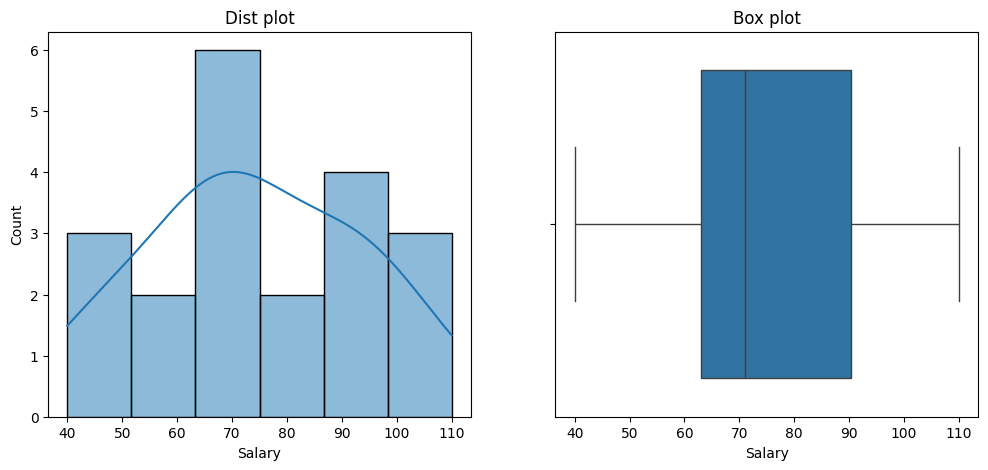

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['Salary'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df_filtered, x  = 'Salary')
plt.title("Box plot")

plt.show()

In [ ]:
#replace the outliers with mean and median
df['Salary_mean_imputed'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])

In [ ]:
df

,Salary,Salary_mean_imputed
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


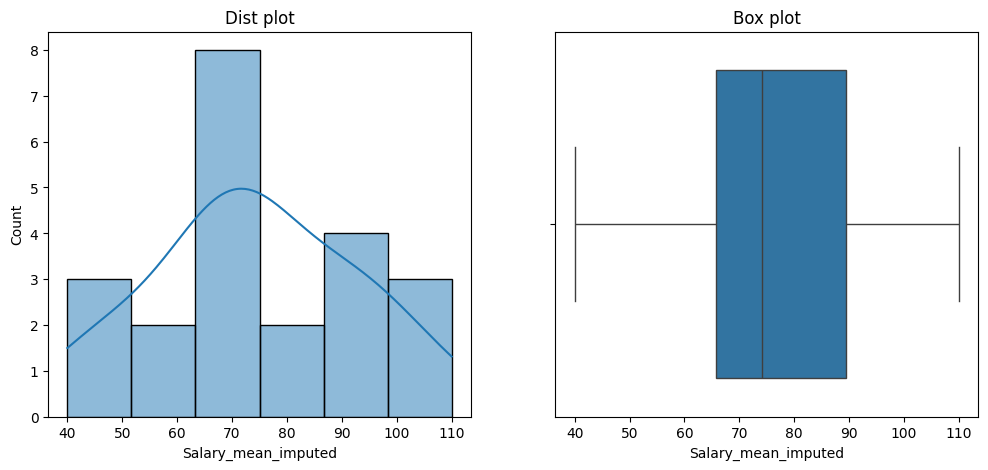

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_mean_imputed'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x  = 'Salary_mean_imputed')
plt.title("Box plot")

plt.show()

In [ ]:
#capping >> replacing outlier with the nearest values that is not outlier

In [ ]:
lower_cap = df['Salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap = df['Salary'].quantile(0.95)

In [ ]:
upper_cap

109.55

In [ ]:
lower_cap

40.25

In [ ]:
df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap,
                              np.where(df['Salary'] > upper_cap, upper_cap, df['Salary']))

In [ ]:
df

,Salary,Salary_mean_imputed,Salary_capped
0,11,74.318182,40.25
1,40,40.000000,40.25
2,45,45.000000,45.00
3,68,68.000000,68.00
4,65,65.000000,65.00
5,68,68.000000,68.00
6,78,78.000000,78.00
7,90,90.000000,90.00
8,57,57.000000,57.00
9,74,74.000000,74.00


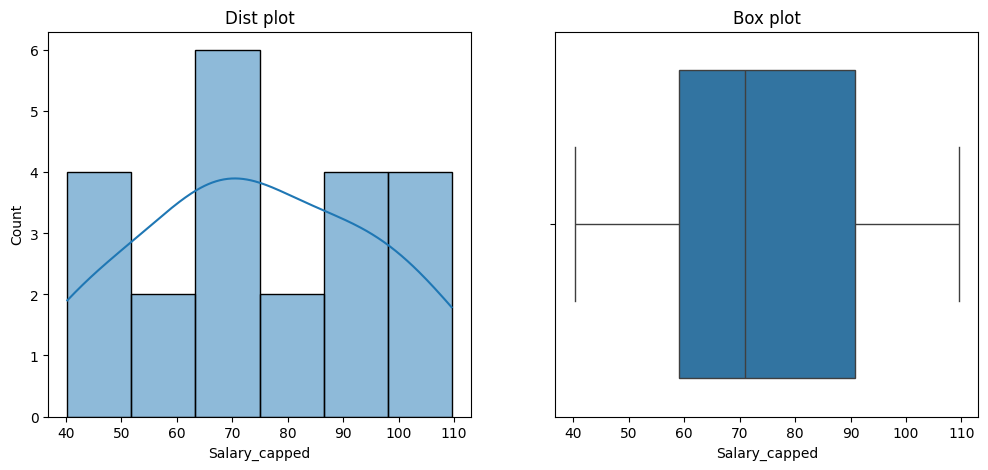

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x  = 'Salary_capped')
plt.title("Box plot")

plt.show()

In [ ]:
#replace the outliers with mean and  median
# df['Salary_mean_imputed'] = np.where((df.Salary >= upper_fence) | (df.salary <= lower_fance), df['Salary'].mean(), df['Salary'] )

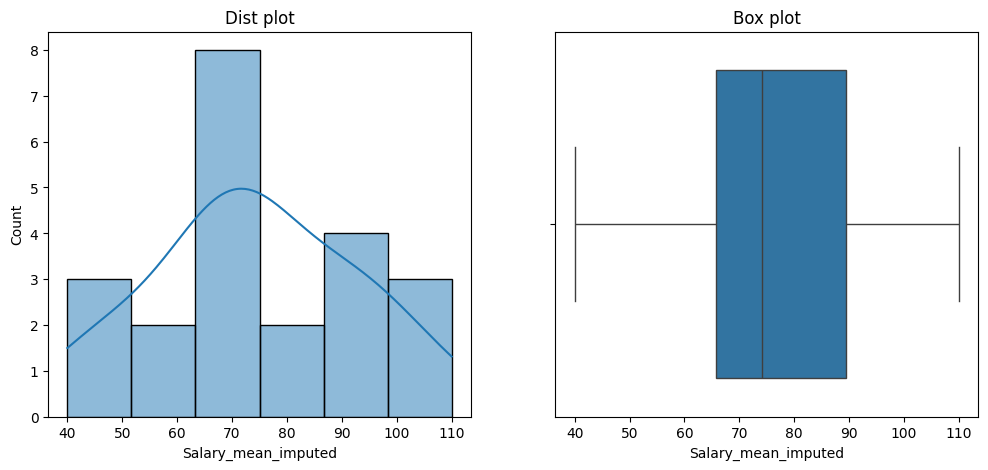

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_mean_imputed'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x  = 'Salary_mean_imputed')
plt.title("Box plot")

plt.show()